### Extracting text from different file sources
* Image
* PDF
* DOCX

### Extracting text from images
## OCR

pip

In [1]:
pip install pytesseract opencv-python

   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   - -------------------------------------- 1.8/39.0 MB 8.4 MB/s eta 0:00:05
   --- ------------------------------------ 3.7/39.0 MB 8.6 MB/s eta 0:00:05
   ------ --------------------------------- 6.0/39.0 MB 9.4 MB/s eta 0:00:04
   -------- ------------------------------- 8.1/39.0 MB 9.6 MB/s eta 0:00:04
   --------- ------------------------------ 9.7/39.0 MB 8.9 MB/s eta 0:00:04
   ------------ --------------------------- 11.8/39.0 MB 9.1 MB/s eta 0:00:04
   ------------ --------------------------- 11.8/39.0 MB 9.1 MB/s eta 0:00:04
   ------------ --------------------------- 11.8/39.0 MB 9.1 MB/s eta 0:00:04
   ------------ --------------------------- 11.8/39.0 MB 9.1 MB/s eta 0:00:04
   ------------ --------------------------- 12.1/39.0 MB 5.6 MB/s eta 0:00:05
   ------------ --------------------------- 12.3/39.0 MB 5.3 MB/s eta 0:00:06
   ------------ --------------------------- 12.3/39.0 MB 5.3 MB/s eta 0:00:06

In [3]:
pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.1 MB 9.0 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.1 MB 10.8 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 11.4 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 10.4 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------------------------------------- -- 2.1/2.3 MB 11.7 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 9.9 MB/s  0:00:00

   -------- ------------------------------- 1/5 [fonttools]
   -------- ------------------------------- 1/5 [fonttools]
   -------- ------------------------------- 1/5 [fonttools]
   -------- ------------------------------- 1/5 [fonttools]
   -------- ------------------------------- 1/5 [fonttools]
   -------- ------------------------------- 1/5 [fonttools]
   -------- ------------------------------- 1/5

In [4]:
import pytesseract
import cv2
import matplotlib.pyplot as plt

In [9]:
# lets load and process the image
image=cv2.imread('Capture1.PNG')

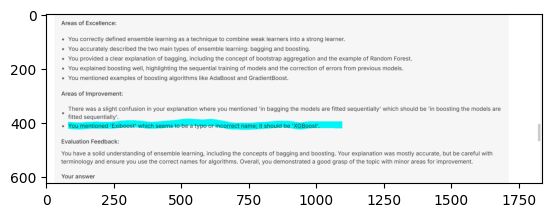

In [10]:
plt.imshow(image)

In [22]:
image1=cv2.imread('notes.jpeg')
image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
image_grey=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
_,image_bw=cv2.threshold(image_grey,95,255,cv2.THRESH_BINARY)

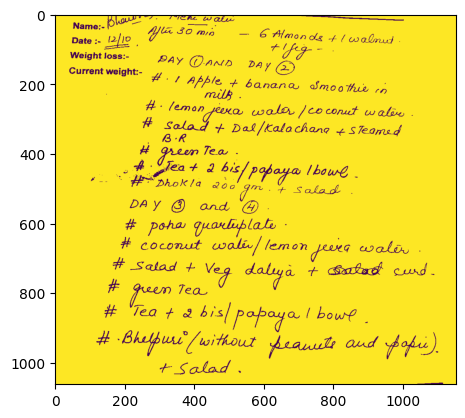

In [23]:
plt.imshow(image_bw)

In [24]:
cv2.imshow('Grey image',image_bw)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [37]:
pytesseract.pytesseract.tesseract_cmd=r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [38]:
print(pytesseract.image_to_string(image_bw))

ON. FAIR tw ake
Name:- pour

li $0 m, ma — 6 Me
Date :. (2/10 | Yi 2208 + walrus «
Weight loss:- Pay Oana Day %
Current weight:-

wos Af ple + banana, Smoothie -

#- (emon pine. walt {coconut wali .
# gelad + Dok/kalachane 2 Sileamed
# Tea .

fA: pleat 2 bis ayn lbourd .
’ a lf PE Salad .

PAY @ and @.

# coconut walin/ lemon G wali .
# Salad + \, <p dala + Seta curd.
# tea. O

# Tea + 2 bis/ pop al bow? -



Note:
* Tesseract is working fine when we have a clear image with typed charcaters. But as we are giving any image of handwritten notes the text that is extracting is not good enough.
* lets try another approach and use LLM model as OCR, we will compare the resulots and see.

In [47]:
import google.generativeai as genai
import cv2
from PIL import Image
import os

In [41]:
key=os.getenv('GGOGLE_API_KEY')
genai.configure(api_key=key)

In [42]:
model=genai.GenerativeModel('gemini-2.5-flash-lite')

In [43]:
prompt='''You need to perform OCR on the given image and extract the text from it.
give only the text as output, do not give any other explanation or description.'''

In [44]:
image1=cv2.imread('notes.jpeg')
image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
image_grey=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
_,image_bw=cv2.threshold(image_grey,95,255,cv2.THRESH_BINARY)

In [48]:
# the image that cv2 gives is in numpy array format, we need to convert it to image object
final_image=Image.fromarray(image_bw)

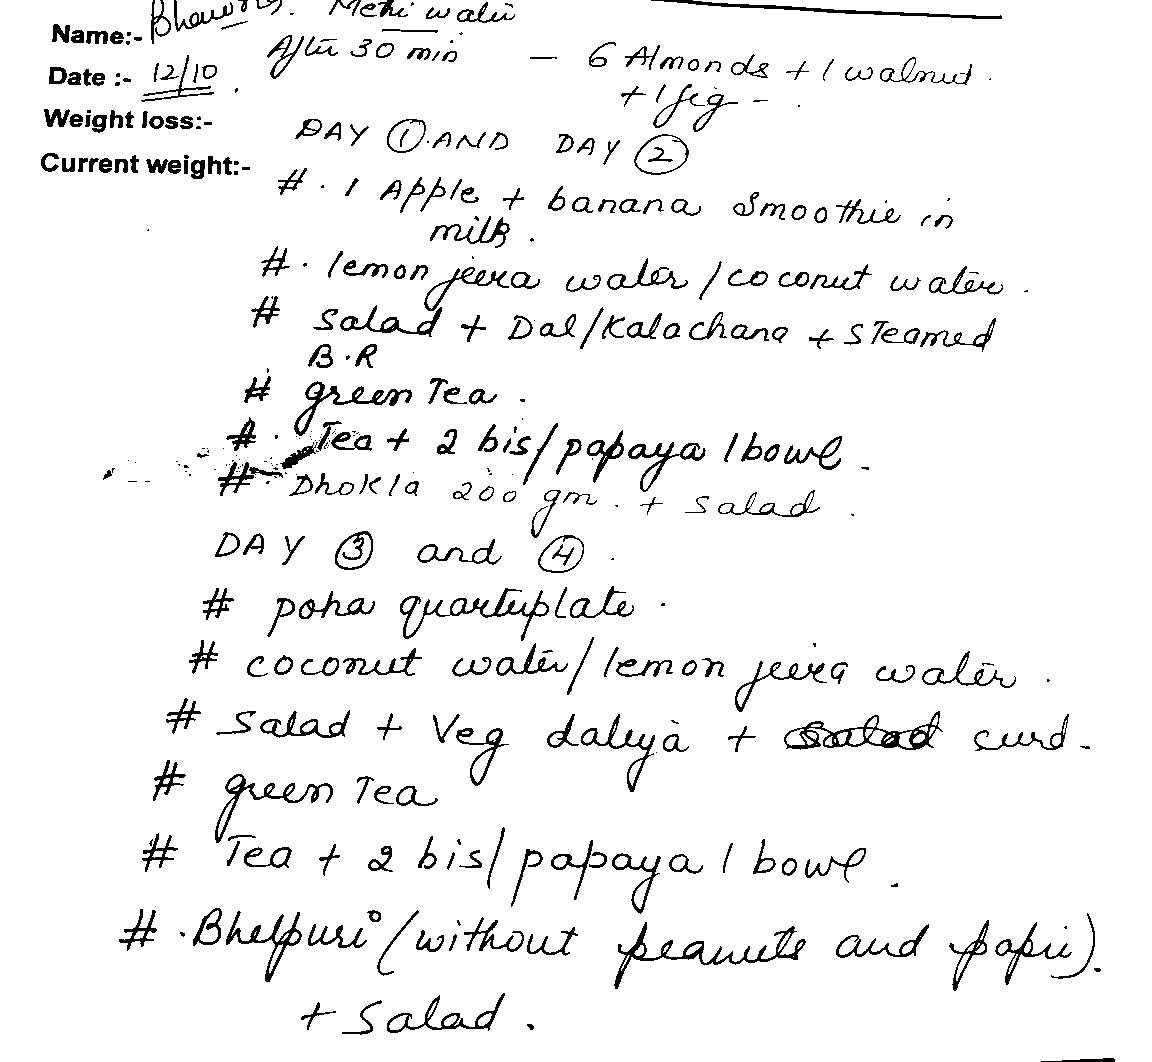

In [49]:
final_image

In [50]:
response=model.generate_content([prompt,final_image])
output_text=response.text
print(output_text)

Name:- Bhaura Metiwalú
Date :- 12/10 After 30 min - 6 Almonds + 1 walnut
Weight loss:- + 1 fig -
DAY ① AND DAY ②
Current weight:- #. 1 Apple + banana smoothie in
milk.
# lemon jeera water/coconut water.
# Salad + Dal/Kalachana + Steamed
B.R
# green Tea.
#.Tea + 2 bis/papaya 1 bowl.
# Dhokla 200 gm. + Salad.

DAY ③ and ④
# poha quartuplate
# coconut water/lemon jeera water.
# Salad + Veg daliya + Salad curd.
# green Tea
# Tea + 2 bis/papaya 1 bowl.
# Bhelpuri (without peanuts and papri).
+ Salad.


Note:

OCR Based on LLM Model seems to be a better option to extract text even from handwritten
notes. it may not be able to extract 100% but still gives better results than tesseract.

## Extract text from DOCX (Word Document)

In [52]:
pip install python-docx

   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   ---------------------------- ----------- 2.9/4.0 MB 12.3 MB/s eta 0:00:01
   ---------------------------------------  3.9/4.0 MB 12.2 MB/s eta 0:00:01
   ---------------------------------------- 4.0/4.0 MB 6.2 MB/s  0:00:00

   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   ----------------------------------------

In [53]:
from docx import Document

In [54]:
# lets read the docx file
file=Document('doc1.docx')

In [55]:
file.paragraphs[12].text

'4. What are skewness and kurtosis?'

In [58]:
text_extracted=' '.join([p.text for p in file.paragraphs])

In [59]:
print(text_extracted)

STATISTICS   Descriptive Statistics 1. What is the difference between population and sample? Population refers to the entire group being studied, while a sample is a subset of the population used for analysis. 2. What are mean, median, and mode? Mean: The average of all values. Median: The middle value when arranged in order. Mode: The most frequently occurring value. 3. What is the difference between variance and standard deviation? Variance measures how far data points are from the mean, squared. Standard deviation is the square root of variance, making it more interpretable in the same units as the data. 4. What are skewness and kurtosis? Skewness: Measures the asymmetry of the data distribution. Positive skew → right tail is longer. Negative skew → left tail is longer. Kurtosis: Measures the "tailedness" of the distribution. High kurtosis → more outliers (leptokurtic). Low kurtosis → fewer outliers (platykurtic). 5. What is the difference between a parameter and a statistic? Parame